In [2]:
path_to_file = "../files/pima-indians-diabetes.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(path_to_file)

In [5]:
df.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df_class = df.drop(['class'], axis=1)

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
arrNorm = scaler.fit_transform(df)
dfNorm = pd.DataFrame(arrNorm)

In [148]:
dfNorm.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [149]:
np.savetxt("pima-indians-diabetes-Normalised.csv", dfNorm, delimiter=",")

In [150]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
Std = scaler.fit_transform(df)
dfStd = pd.DataFrame(Std)

In [151]:
dfStd.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [154]:
np.savetxt("pima-indians-diabetes-Standardised.csv", dfNorm, delimiter=",")

df1 = df[df['class']==1]
df1_train = df1[:int(0.7*len(df1))]
df1_test = df1[int(0.7*len(df1)):]

df0 = df[df['class']==0]
df0_train = df0[:int(0.7*len(df0))]
df0_test = df0[int(0.7*len(df0)):]

df_test = pd.concat([df1_test, df0_test])
df_train = pd.concat([df1_train, df0_train])

In [13]:
df1.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [12]:
df_train.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [155]:
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:, 0:-1])
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [156]:
np.savetxt("diabetes-train.csv", df_train, delimiter=",")
np.savetxt("diabetes-test.csv", df_test, delimiter=",")

cols = [col for col in df_train]
cols = cols[:-1]
features = list(zip(df[col] for col in cols))

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
model = KNeighborsClassifier(n_neighbors=5)

label = le.fit_transform(df_train['class'])

model.fit(features, label)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.6753246753246753


In [158]:
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21]

In [159]:
accuracies = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = (accuracy_score(y_test, pred))
    accuracies.append(accuracy)

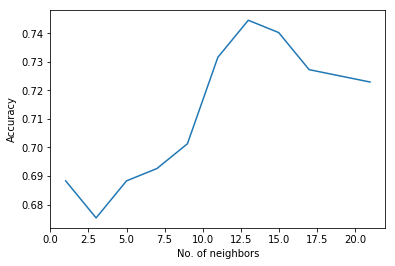

In [160]:
plt.plot(neighbors, accuracies)
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [6]:
df.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [12]:
# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [13]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [15]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [17]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return([XTrain,XTest,yTrain,yTest])